---
title: Kane's method -- Example 2
---

## Example 2
This example uses $\vec{r}= x\hat{n}_x + y\hat{n}_y$ as the position vector for p.  This requires an added constraint to maintain the length of r, as in $|\vec{r}|=l_A$

In [1]:
%matplotlib inline

In [2]:
# -*- coding: utf-8 -*-
"""
Written by Daniel M. Aukes
Email: danaukes<at>gmail.com
Please see LICENSE for full license.
"""

import sympy
sympy.init_printing(pretty_print=False)

import pynamics
pynamics.integrator = 0
from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant,Variable
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle
from pynamics.constraint import AccelerationConstraint
import pynamics.integration

import numpy
import matplotlib.pyplot as plt
plt.ion()
from math import pi
system = System()
pynamics.set_system(__name__,system)

lA = Constant(1,'lA',system)

mA = Constant(1,'mA',system)

g = Constant(9.81,'g',system)
b = Constant(1e0,'b',system)
k = Constant(1e1,'k',system)

preload1 = Constant(0*pi/180,'preload1',system)

x,x_d,x_dd = Differentiable('x',system)
y,y_d,y_dd = Differentiable('y',system)

initialvalues = {}
initialvalues[x]=1
initialvalues[y]=0
initialvalues[x_d]=0
initialvalues[y_d]=0

N = Frame('N',system)

system.set_newtonian(N)

pNA2=2*N.x
pAB2=pNA2+x*N.x+y*N.y
vAB2=pAB2.time_derivative(N,system)

ParticleB = Particle(pAB2,mA,'ParticleB',system)

system.addforce(-b*vAB2,vAB2)
system.addforcegravity(-g*N.y)


v = pAB2-pNA2
u = (v.dot(v))**.5

eq1 = v.dot(v) - lA**2
eq1_d=system.derivative(eq1)
eq1_dd=system.derivative(eq1_d)
eq = [eq1_dd]

constraint = AccelerationConstraint([eq1_dd])
system.add_constraint(constraint)

tol = 1e-4

tinitial = 0
tfinal = 5
tstep = 1/30
t = numpy.r_[tinitial:tfinal:tstep]

f,ma = system.getdynamics()
func = system.state_space_post_invert(f,ma,constants=system.constant_values)

statevariables = system.get_state_variables()
ini = [initialvalues[item] for item in statevariables]


states=pynamics.integration.integrate(func,ini,t,rtol=tol,atol=tol)

points = [pNA2,pAB2]
points_output = PointsOutput(points,system)
points_output.calc(states,t)


2022-03-16 10:20:22,925 - pynamics.system - INFO - getting dynamic equations
2022-03-16 10:20:22,934 - pynamics.system - INFO - solving a = f/m and creating function
2022-03-16 10:20:22,941 - pynamics.system - INFO - substituting constrained in Ma-f.
2022-03-16 10:20:23,036 - pynamics.system - INFO - done solving a = f/m and creating function
2022-03-16 10:20:23,081 - pynamics.integration - INFO - beginning integration
2022-03-16 10:20:23,082 - pynamics.system - INFO - integration at time 0000.00
2022-03-16 10:20:23,095 - pynamics.integration - INFO - finished integration
2022-03-16 10:20:23,099 - pynamics.output - INFO - calculating outputs
2022-03-16 10:20:23,101 - pynamics.output - INFO - done calculating outputs


array([[[ 2.        ,  0.        ],
        [ 3.        ,  0.        ]],

       [[ 2.        ,  0.        ],
        [ 2.99998203, -0.00538733]],

       [[ 2.        ,  0.        ],
        [ 2.99976302, -0.02132237]],

       [[ 2.        ,  0.        ],
        [ 2.99885933, -0.0474323 ]],

       [[ 2.        ,  0.        ],
        [ 2.99650195, -0.08332709]],

       [[ 2.        ,  0.        ],
        [ 2.99168514, -0.12854002]],

       [[ 2.        ,  0.        ],
        [ 2.98320013, -0.18247606]],

       [[ 2.        ,  0.        ],
        [ 2.96968855, -0.24435835]],

       [[ 2.        ,  0.        ],
        [ 2.94971279, -0.31316814]],

       [[ 2.        ,  0.        ],
        [ 2.92185909, -0.38759615]],

       [[ 2.        ,  0.        ],
        [ 2.8848251 , -0.46602213]],

       [[ 2.        ,  0.        ],
        [ 2.8375319 , -0.54651567]],

       [[ 2.        ,  0.        ],
        [ 2.77924791, -0.62686496]],

       [[ 2.        ,  0.        ],
  

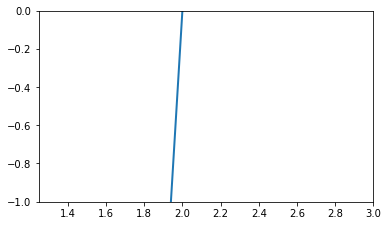

In [3]:
points_output.animate(fps = 30,lw=2)
from IPython.display import HTML
HTML(points_output.anim.to_html5_video())